<a href="https://colab.research.google.com/github/yashasangani/DeepLearning-6th-July/blob/main/Restaurant_Reviews_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment analysis with keras

In [3]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1. Read the dataset

In [4]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/Restaurant_Reviews.tsv"
df = pd.read_csv(url,sep = '\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [10]:
s = " WELCOME, to Deep Learninbg Class!!!!"
s = s.lower()
s

' welcome, to deep learninbg class!!!!'

In [11]:
# provide proper pattern [^a-z<space>]

In [12]:
import re
s1 = re.sub("[^a-z ]","",s)
s1

' welcome to deep learninbg class'

### create a function to preprocess text

In [13]:
def preprocess_text(s):
  s = s.lower()
  s = re.sub("[^a-z ]","",s)
  return s

In [14]:
a = "Wow..., The experience was very good"
preprocess_text(a)

'wow the experience was very good'

In [18]:
df['Review_pre'] = df['Review'].apply(preprocess_text)


### Apply TFIDF vectorizer

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x_pre = tfidf.fit_transform(df['Review_pre']).toarray()

In [80]:
x_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
x_pre.shape

(1000, 2046)

In [22]:
y = df['Liked']

In [23]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: Liked, dtype: int64

# Apply Train Test split

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_pre,y,test_size = 0.2,random_state = 0)

In [33]:
x_train.shape

(800, 2046)

In [34]:
y_train.shape

(800,)

In [35]:
x_test.shape

(200, 2046)

In [36]:
y_test

993    0
859    0
298    0
553    0
672    0
      ..
679    0
722    1
215    1
653    0
150    1
Name: Liked, Length: 200, dtype: int64

### Build the Neural Net

In [37]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Input
from keras.callbacks import EarlyStopping

In [46]:
model = Sequential()

# input layer
model.add(Input(shape=(x_train.shape[1],)))

# Hidden layer1
model.add(Dense(256,activation = 'relu'))
#Dropout layer1
model.add(Dropout(0.6))

# Hidden layer2
model.add(Dense(128,activation = 'relu'))
#Dropout layer2
model.add(Dropout(0.6))

#output layer
model.add(Dense(1,activation = 'sigmoid'))

In [48]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [49]:
es = EarlyStopping(patience = 10)

In [50]:
hist = model.fit(x_train,y_train,validation_split = 0.2,
                 batch_size = 16,
                 epochs=100,
                 callbacks = [es])

Epoch 1/100
40/40 [==============================] - 1s 7ms/step - loss: 0.6909 - accuracy: 0.5297 - val_loss: 0.6846 - val_accuracy: 0.6750
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6700 - accuracy: 0.6750 - val_loss: 0.6570 - val_accuracy: 0.7750
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.5922 - accuracy: 0.8234 - val_loss: 0.5762 - val_accuracy: 0.7063
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3900 - accuracy: 0.9031 - val_loss: 0.3978 - val_accuracy: 0.8500
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1953 - accuracy: 0.9484 - val_loss: 0.3530 - val_accuracy: 0.8500
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0894 - accuracy: 0.9797 - val_loss: 0.3932 - val_accuracy: 0.8250
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0536 - accuracy: 0.9906 - val_loss: 0.4310 - val_accuracy: 0.8250
Epoch 8/100
4

# Learning Curve

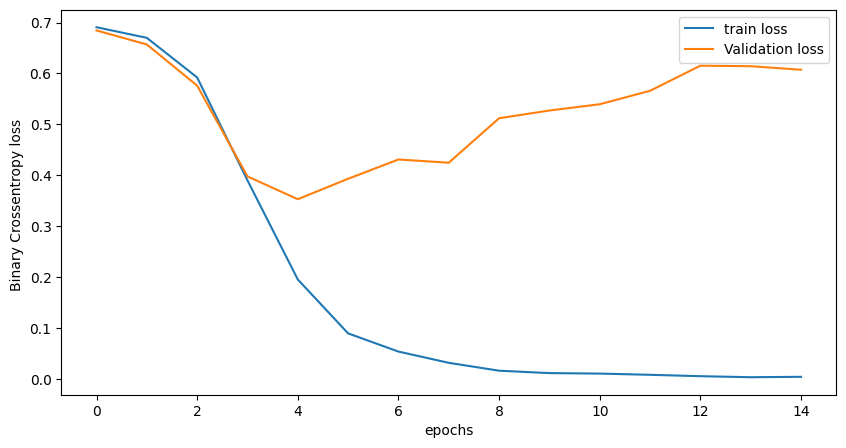

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.plot(hist.history['loss'],label = 'train loss')
plt.plot(hist.history['val_loss'],label = 'Validation loss')
plt.xlabel('epochs')
plt.ylabel('Binary Crossentropy loss ')
plt.legend()
plt.show()



## Evaluate the model

In [52]:
model.evaluate(x_train,y_train)

25/25 [==============================] - 0s 2ms/step - loss: 0.1220 - accuracy: 0.9650


[0.12203168869018555, 0.9649999737739563]

In [53]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.5519 - accuracy: 0.7900


[0.5519147515296936, 0.7900000214576721]

### Predict the results for train and test

In [47]:
y_prob_train = model.predict(x_train)
y_prob_test = model.predict(x_test)

7/7 [==============================] - 0s 3ms/step


In [54]:
y_prob_train[0:5]

array([[0.49297577],
       [0.49335548],
       [0.5025208 ],
       [0.49788716],
       [0.49754414]], dtype=float32)

In [55]:
ypred_train = [1 if prob>=0.5 else 0 for prob in y_prob_train]
ypred_test = [1 if prob>= 0.5 else 0 for prob in y_prob_test]


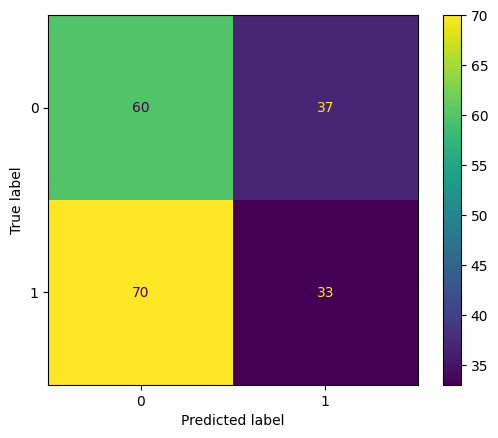

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,ypred_test)


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.46      0.62      0.53        97
           1       0.47      0.32      0.38       103

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.46       200
weighted avg       0.47      0.47      0.45       200



## Save the model for future use

In [68]:
model.save("SentimentalModel.keras")

## Load the model

In [71]:
from keras.models import load_model

In [73]:
nn = load_model("/content/SentimentalModel.keras")
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               524032    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 557057 (2.13 MB)
Trainable params: 557057 (2.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Out of sample prediction

In [74]:
s = "Very tasty food"
t = tfidf.transform([s]).toarray()

In [75]:
model.predict(t)

1/1 [==============================] - 0s 17ms/step


array([[0.97373235]], dtype=float32)

In [76]:
def predict_sentiment():
  text = input("Please enter restuaraunt review : ")
  text_pre = preprocess_text(text)
  text_pre = tfidf.transform([text]).toarray()
  prob = model.predict(text_pre)
  if prob>=0.5:
    print("Positive review")
  else:
    print("Negative Review")
    return prob

In [81]:
predict_sentiment()


Please enter restuaraunt review : my experience was awsome
1/1 [==============================] - 0s 17ms/step
Positive review


In [82]:
predict_sentiment()

Please enter restuaraunt review : over showoff
1/1 [==============================] - 0s 17ms/step
Negative Review


array([[0.00473408]], dtype=float32)